In [15]:
import os
import dotenv
import sys
dotenv.load_dotenv()
sys.path.append(os.getenv('LIBRARY_PATH'))

import pandas as pd
import numpy as np

# Custom imports
from finance import implied_volatility, black_scholes

# Initial EDA

In [28]:
data = pd.read_csv(os.getenv('DATA_PATH'))
# full data check
data.info()
call_data = data    # im lazy

# # Filter out put options, keep only calls
# call_data = data[data['Option Type'].str.lower() == 'call']
# call_data.info()

# # Print the shape to confirm filtering
# print(f"Number of rows after filtering for call options: {len(cleaned_data)}")
# cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198749 entries, 0 to 1198748
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Timestamp        1198749 non-null  object 
 1   Stock Price      1145403 non-null  float64
 2   Symbol           1198749 non-null  object 
 3   Option Type      1198749 non-null  object 
 4   Strike Price     1198749 non-null  float64
 5   Ask Price        1198749 non-null  float64
 6   Bid Price        1198749 non-null  float64
 7   Expiration Date  1198749 non-null  object 
dtypes: float64(4), object(4)
memory usage: 73.2+ MB


### Missing Data Analysis

<Figure size 1000x600 with 0 Axes>

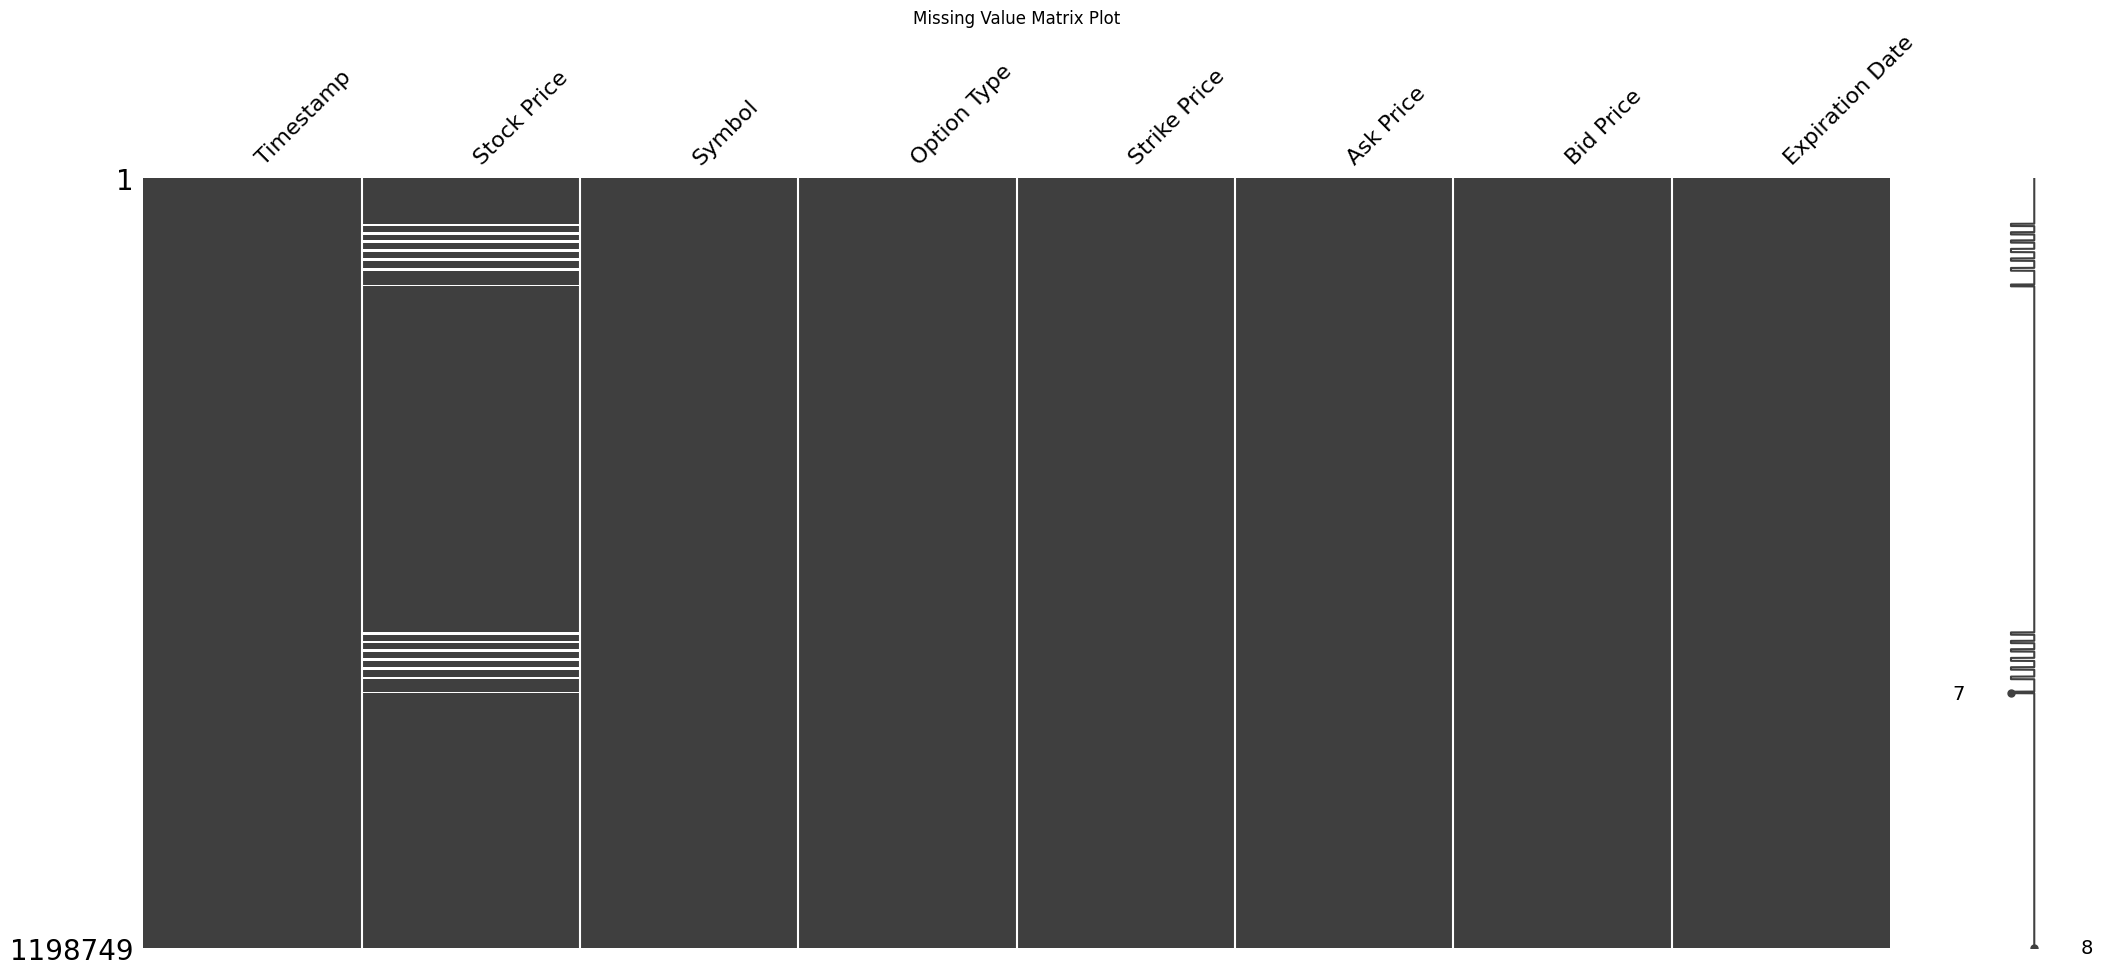

<Figure size 1000x800 with 0 Axes>

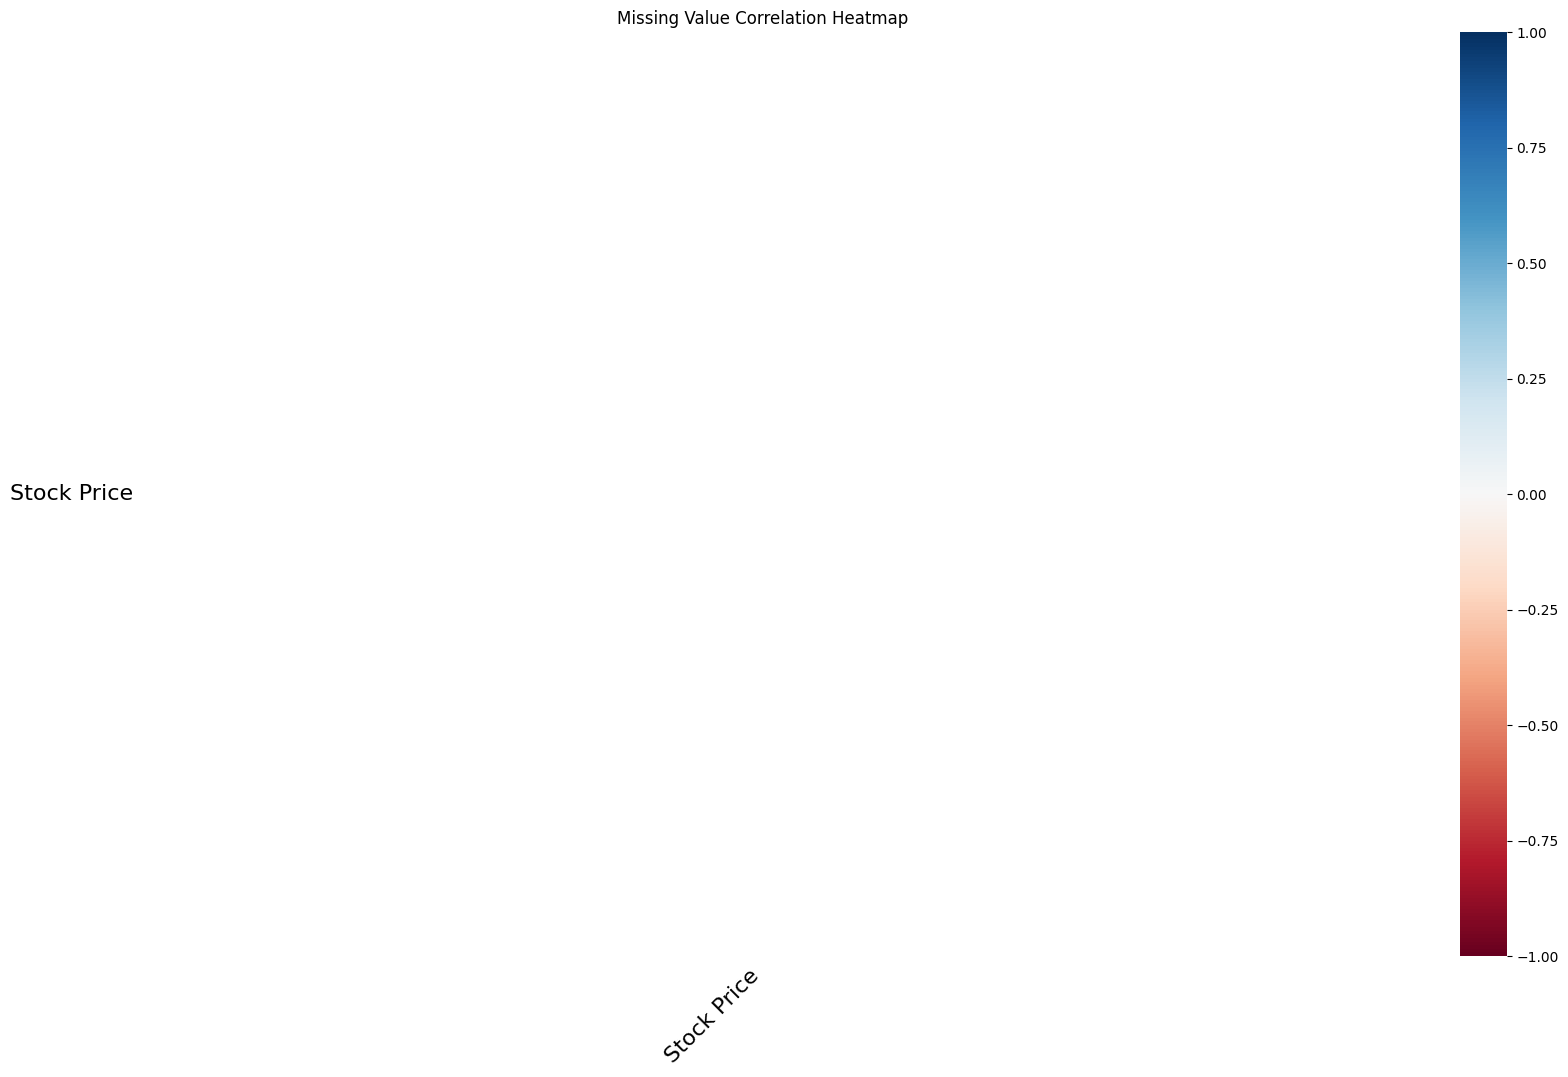


Missing Value Summary:
                 Missing Values  Percentage Missing
Stock Price               53346            4.450139
Timestamp                     0            0.000000
Symbol                        0            0.000000
Option Type                   0            0.000000
Strike Price                  0            0.000000
Ask Price                     0            0.000000
Bid Price                     0            0.000000
Expiration Date               0            0.000000


In [29]:
# 1. Matrix plot
plt.figure(figsize=(10, 6))
msno.matrix(call_data)
plt.title('Missing Value Matrix Plot')
plt.show()

# 3. Correlation heatmap of missing values
plt.figure(figsize=(10, 8))
msno.heatmap(call_data)
plt.title('Missing Value Correlation Heatmap')
plt.show()


# Summary statistics of missing values
missing_summary = pd.DataFrame({
    'Missing Values': call_data.isnull().sum(),
    'Percentage Missing': (call_data.isnull().sum() / len(call_data)) * 100
}).sort_values('Missing Values', ascending=False)

print("\nMissing Value Summary:")
print(missing_summary)

In [30]:
missing_df = call_data[call_data['Stock Price'].isnull()]
missing_df

,Timestamp,Stock Price,Symbol,Option Type,Strike Price,Ask Price,Bid Price,Expiration Date
71345,2024-10-12,NaN,MSTR241018C00037000,call,37.0,176.95,173.40,2024-10-18
71346,2024-10-12,NaN,MSTR241018C00039000,call,39.0,174.85,171.55,2024-10-18
71347,2024-10-12,NaN,MSTR241018C00041000,call,41.0,172.90,169.40,2024-10-18
71348,2024-10-12,NaN,MSTR241018C00042000,call,42.0,171.85,168.40,2024-10-18
71349,2024-10-12,NaN,MSTR241018C00044000,call,44.0,169.90,166.40,2024-10-18
...,...,...,...,...,...,...,...,...
802184,2024-11-28,NaN,MSTR270115P00560000,put,560.0,344.05,334.85,2027-01-15
802185,2024-11-28,NaN,MSTR270115P00600000,put,600.0,376.55,367.55,2027-01-15
802186,2024-11-28,NaN,MSTR270115P00610000,put,610.0,387.75,376.30,2027-01-15
802187,2024-11-28,NaN,MSTR270115P00620000,put,620.0,395.55,384.15,2027-01-15


In [32]:
missing_df['Timestamp'].unique()

array(['2024-10-12', '2024-10-13', '2024-10-19', '2024-10-20',
       '2024-10-26', '2024-10-27', '2024-11-02', '2024-11-03',
       '2024-11-09', '2024-11-10', '2024-11-16', '2024-11-17',
       '2024-11-28'], dtype=object)

Looking more closely, we can see that the missing values occur on weekends starting in early mid october 2024 to early mid november leading into Thanksgiving that same year.